# Data pre-processing
## JASON files: train, dev, test

In [1]:
import os
import pandas as pd
import numpy as np
import json
import pickle

In [2]:
# This data in json file
# read csqa.train.json, csqa.dev.json
# topic tagset = "O", "B_SBJ", "I_SBJ"
df = pd.read_json('data/csqa.train.json')
df

,id,tokens,relation,topic_tags,direction
0,1,"[[CLS], what, does, pat, kelch, do, for, a, li...",P106,"[O, O, O, B_SBJ, I_SBJ, O, O, O, O, O, O]",out
1,3,"[[CLS], which, state, did, emperor, gaozong, o...",P53,"[O, O, O, O, B_SBJ, I_SBJ, I_SBJ, I_SBJ, O, O,...",out
2,4,"[[CLS], what, is, the, profession, of, shane, ...",P106,"[O, O, O, O, O, O, B_SBJ, I_SBJ, O, O]",out
3,5,"[[CLS], which, sports, teams, are, shane, jenn...",P54,"[O, O, O, O, O, B_SBJ, I_SBJ, O, O, O, O, O]",out
4,6,"[[CLS], which, flag, is, associated, with, net...",P163,"[O, O, O, O, O, O, B_SBJ, O, O]",out
...,...,...,...,...,...
406208,447283,"[[CLS], which, works, of, art, have, united, s...",P921,"[O, O, O, O, O, O, B_OBJ, I_OBJ, I_OBJ, I_OBJ,...",in
406209,447284,"[[CLS], which, applications, use, english, as,...",P407,"[O, O, O, O, B_OBJ, O, O, O, O]",in
406210,447285,"[[CLS], which, administrative, territory, was,...",P19,"[O, O, O, O, O, B_SBJ, I_SBJ, O, O, O, O]",out
406211,447286,"[[CLS], what, is, ivana, isailovic, a, member,...",P54,"[O, O, O, B_SBJ, I_SBJ, O, O, O, O, O]",out


In [3]:
# train set
# get token length
tok_len = df["tokens"].tolist()
print(tok_len[0])

# get max length
length = 0
for tok in tok_len:
    if len(tok) > length:
        length = len(tok)
print("max_length of train tokens: ", length)

['[CLS]', 'what', 'does', 'pat', 'kelch', 'do', 'for', 'a', 'living', '?', '[SEP]']
max_length of train tokens:  40


In [4]:
# This is relation tagset
# num of relation classes = 281 
tagset = pd.read_json('tagsets/csqa_tags.json')
tagset

,0
0,P6
1,P7
2,P9
3,P16
4,P17
...,...
276,P3179
277,P3195
278,P3279
279,P3301


In [7]:
df_dev = pd.read_json('data/csqa.dev.json')
df_dev

,id,tokens,relation,topic_tags,direction
0,1,"[[CLS], which, color, is, robocop, associated,...",P462,"[O, O, O, O, B_SBJ, O, O, O, O]",out
1,2,"[[CLS], which, person, directed, robocop, ?, [...",P57,"[O, O, O, O, B_SBJ, O, O]",out
2,3,"[[CLS], which, political, territory, is, event...",P17,"[O, O, O, O, O, B_SBJ, I_SBJ, O, O, O, O, O]",out
3,4,"[[CLS], which, works, of, art, are, jim, sharm...",P58,"[O, O, O, O, O, O, B_OBJ, I_OBJ, O, O, O, O, O]",in
4,5,"[[CLS], who, directed, shock, treatment, and, ...",P57,"[O, O, O, B_SBJ, I_SBJ, O, B_SBJ, I_SBJ, I_SBJ...",out
...,...,...,...,...,...
45071,49663,"[[CLS], what, is, the, nucleic, acid, sequence...",P688,"[O, O, O, O, O, O, O, O, O, O, O, B_OBJ, I_OBJ...",in
45072,49665,"[[CLS], which, cellular, components, are, comp...",P681,"[O, O, O, O, O, O, O, B_SBJ, I_SBJ, I_SBJ, I_S...",out
45073,49666,"[[CLS], what, situation, did, h, ., david, dal...",P1196,"[O, O, O, O, B_SBJ, I_SBJ, I_SBJ, I_SBJ, O, O,...",out
45074,49667,"[[CLS], what, is, forename, of, h, ., david, d...",P735,"[O, O, O, O, O, B_SBJ, I_SBJ, I_SBJ, I_SBJ, O, O]",out


In [8]:
# dev set
# get token length
tok_len_dev = df_dev["tokens"].tolist()
print(tok_len_dev[0])

# get max length
length = 0
for tok in tok_len_dev:
    if len(tok) > length:
        length = len(tok)
print("max_length of dev tokens: ", length)

['[CLS]', 'which', 'color', 'is', 'robocop', 'associated', 'with', '?', '[SEP]']
max_length of dev tokens:  32


In [2]:
df_test = pd.read_json('data/csqa.test.json')
df_test

,id,relation,topic_tags,direction,tokens
0,1,P937,{'Q274404': 'Claudio Magris'},out,"[[CLS], what, is, the, location, where, claudi..."
1,2,P20,{'Q11683680': 'Irv Kupcinet'},out,"[[CLS], where, did, the, expiration, of, irv, ..."
2,3,P106,{'Q15982611': 'Frederic George Young'},out,"[[CLS], what, are, the, job, of, frederic, geo..."
3,4,P27,{'Q1609574': 'Leonie Baumann'},out,"[[CLS], which, political, territory, is, leoni..."
4,5,P162,{'Q1361236': 'Eroica'},out,"[[CLS], which, person, produced, eroica, ?, [S..."
...,...,...,...,...,...
72326,77571,P703,{'Q23325792': 'ketol-acid reductoisomerase DVU...,out,"[[CLS], where, is, ketol, -, acid, reductoisom..."
72327,77572,P702,{'Q27550220': 'adenylyl-sulfate kinase YKL001C'},out,"[[CLS], which, gene, encodes, adenylyl, -, sul..."
72328,77573,P703,{'Q23526879': 'flavodoxin CA_C3664'},out,"[[CLS], which, taxon, is, flavodoxin, ca, _, c..."
72329,77574,P512,{'Q1579016': 'Hans Christoph Wolf'},out,"[[CLS], what, is, the, name, of, the, degree, ..."


# embeddings
## train embs

In [36]:
# This is training set embedding
embs = []

# 'rb' is important! 'rb' = Opens a file for reading only in binary format.
with open('data/csqa.train.embeddings.bin', 'rb') as f:  
    embs = pickle.load(f)

# number of questions, number of tokens of the first question, 
# number of elements in the first token's embedding (always 768)
# embs is a list of array
print(len(embs), len(embs[0]), len(embs[0][0]))

406213 11 768


In [37]:
# num_emb = size of the dictionary of embeddings
num_emb = len(embs)
num_emb

406213

## dev embs

In [20]:
# This is development set embedding
embs_dev = []

# 'rb' is important! 'rb' = Opens a file for reading only in binary format.
with open('data/csqa.dev.embeddings.bin', 'rb') as f:  
    embs_dev = pickle.load(f)

# number of questions, number of tokens of the first question, 
# number of elements in the first token's embedding (always 768)
# embs is a list of array
print(len(embs_dev), len(embs_dev[0]), len(embs_dev[0][0]))

45076 9 768


## test embs

In [3]:
# This is test set embedding
embs_test = []

# 'rb' is important! 'rb' = Opens a file for reading only in binary format.
with open('data/csqa.test.embeddings.bin', 'rb') as f:  
    embs_test = pickle.load(f)

# number of questions, number of tokens of the first question, 
# number of elements in the first token's embedding (always 768)
# embs is a list of array
print(len(embs_test), len(embs_test[0]), len(embs_test[0][0]))

72331 11 768


# [del] Sentence padding
### This work is not necessary, [CLS] token acts as a representation for the entire sentence

In [10]:
import torch 

In [15]:
from sklearn import preprocessing
# (1) labels encoded, change "P_" into numerical labels
LabelEncoder = preprocessing.LabelEncoder()
LabelEncoder.fit(tagset[0].tolist())
print("This is the length of the relation tag: ", len(list(LabelEncoder.classes_))) # training set relation num = 276
re_labels = LabelEncoder.transform(df["relation"].tolist())
#list(LabelEncoder.inverse_transform(labels)) -> back to label list
print(type(re_labels))
re_labels

This is the length of the relation tag:  281
<class 'numpy.ndarray'>


array([ 13, 199,  13, ...,  91, 202, 208])

In [16]:
#LabelEncoder = preprocessing.LabelEncoder()
#LabelEncoder.fit(df["relation"].tolist())
#print("This is the length of the relation tag: ", len(list(LabelEncoder.classes_))) 

In [65]:
# (2)transfer np.array(numerical labels) into one-hot-vector
tag_onehot = np.zeros((len(df["relation"]), len(tagset)), dtype = np.int)
print("tag_onehot.shape: ", tag_onehot.shape)

tag_onehot[np.arange(re_labels.size), re_labels] = 1
tag_onehot[0]

tag_dict.shape:  (406213, 281)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [69]:
print(len(embs), len(embs[0]), len(embs[0][0]))
# unpadded = max length = 40
# make a length = 768 zero vec add into unpadded sentences (?)

406213 11 768


In [11]:
# batch train embedding
train_set = embs
embs_batch_train = torch.utils.data.DataLoader(train_set, batch_size=100)
len(embs_batch_train)

4063

In [12]:
# batch dev embedding
dev_set = embs_dev
embs_batch_dev = torch.utils.data.DataLoader(dev_set, batch_size=100)
len(embs_batch_dev)

451

# Model Construction: MLP

In [13]:
import os
# path
path = "/mount/arbeitsdaten31/studenten1/dialog-system/2020/student_directories/Chang_Wentseng/"
path_data = os.path.join(path, "data")

In [14]:
import torch.nn as nn

In [31]:
# parameters
lr = 1e-4
batch_size = 50
dropout = 0.2
num_emb = 406213 # size of the dictionary of embeddings 
emb_dim = 768
max_document_length = 40  # each sentence has until 100 words
dev_size = 0.8 # split percentage to train\validation data
#max_size = 5000 # maximum vocabulary size
seed = 1
num_classes = 281
hidden_1 = 256
hidden_2 = 128
output_dim = 64
num_epochs = 1

In [32]:
class MLP(nn.Module):
    def __init__(self, num_emb, emb_dim, hidden_1, hidden_2, output_dim, dropout):
        super().__init__()
        # embedding and convolution layers
        self.embedding = nn.Embedding(num_emb, emb_dim) #####
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)
        self.fc1 = nn.Linear(emb_dim, hidden_1)  # dense layer
        self.fc2 = nn.Linear(hidden_1, hidden_2)  # dense layer
        self.fc3 = nn.Linear(hidden_2, output_dim)  # dense layer

    def forward(self, text, text_lengths):
        x = embedded.view(-1, emb_dim)  # input dim, the size -1 is inferred from other dimensions
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        preds = nn.functional.softmax(self.fc3(x))
        return preds

In [33]:
model = MLP(num_emb, emb_dim, hidden_1, hidden_2, output_dim, dropout)
print(model)

MLP(
  (embedding): Embedding(406213, 768)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (fc1): Linear(in_features=768, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
)


In [34]:
# loss function and optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
loss = nn.CrossEntropyLoss()

# Training
* Basically the same as in github

# Results in mlflow

In [3]:
from IPython.display import Image
from IPython.core.display import HTML 

This is one of dev set result:
* batch_size: 128
* dropout: 0
* epochs: 100
* h_dim1: 256
* learning rate: 0.9

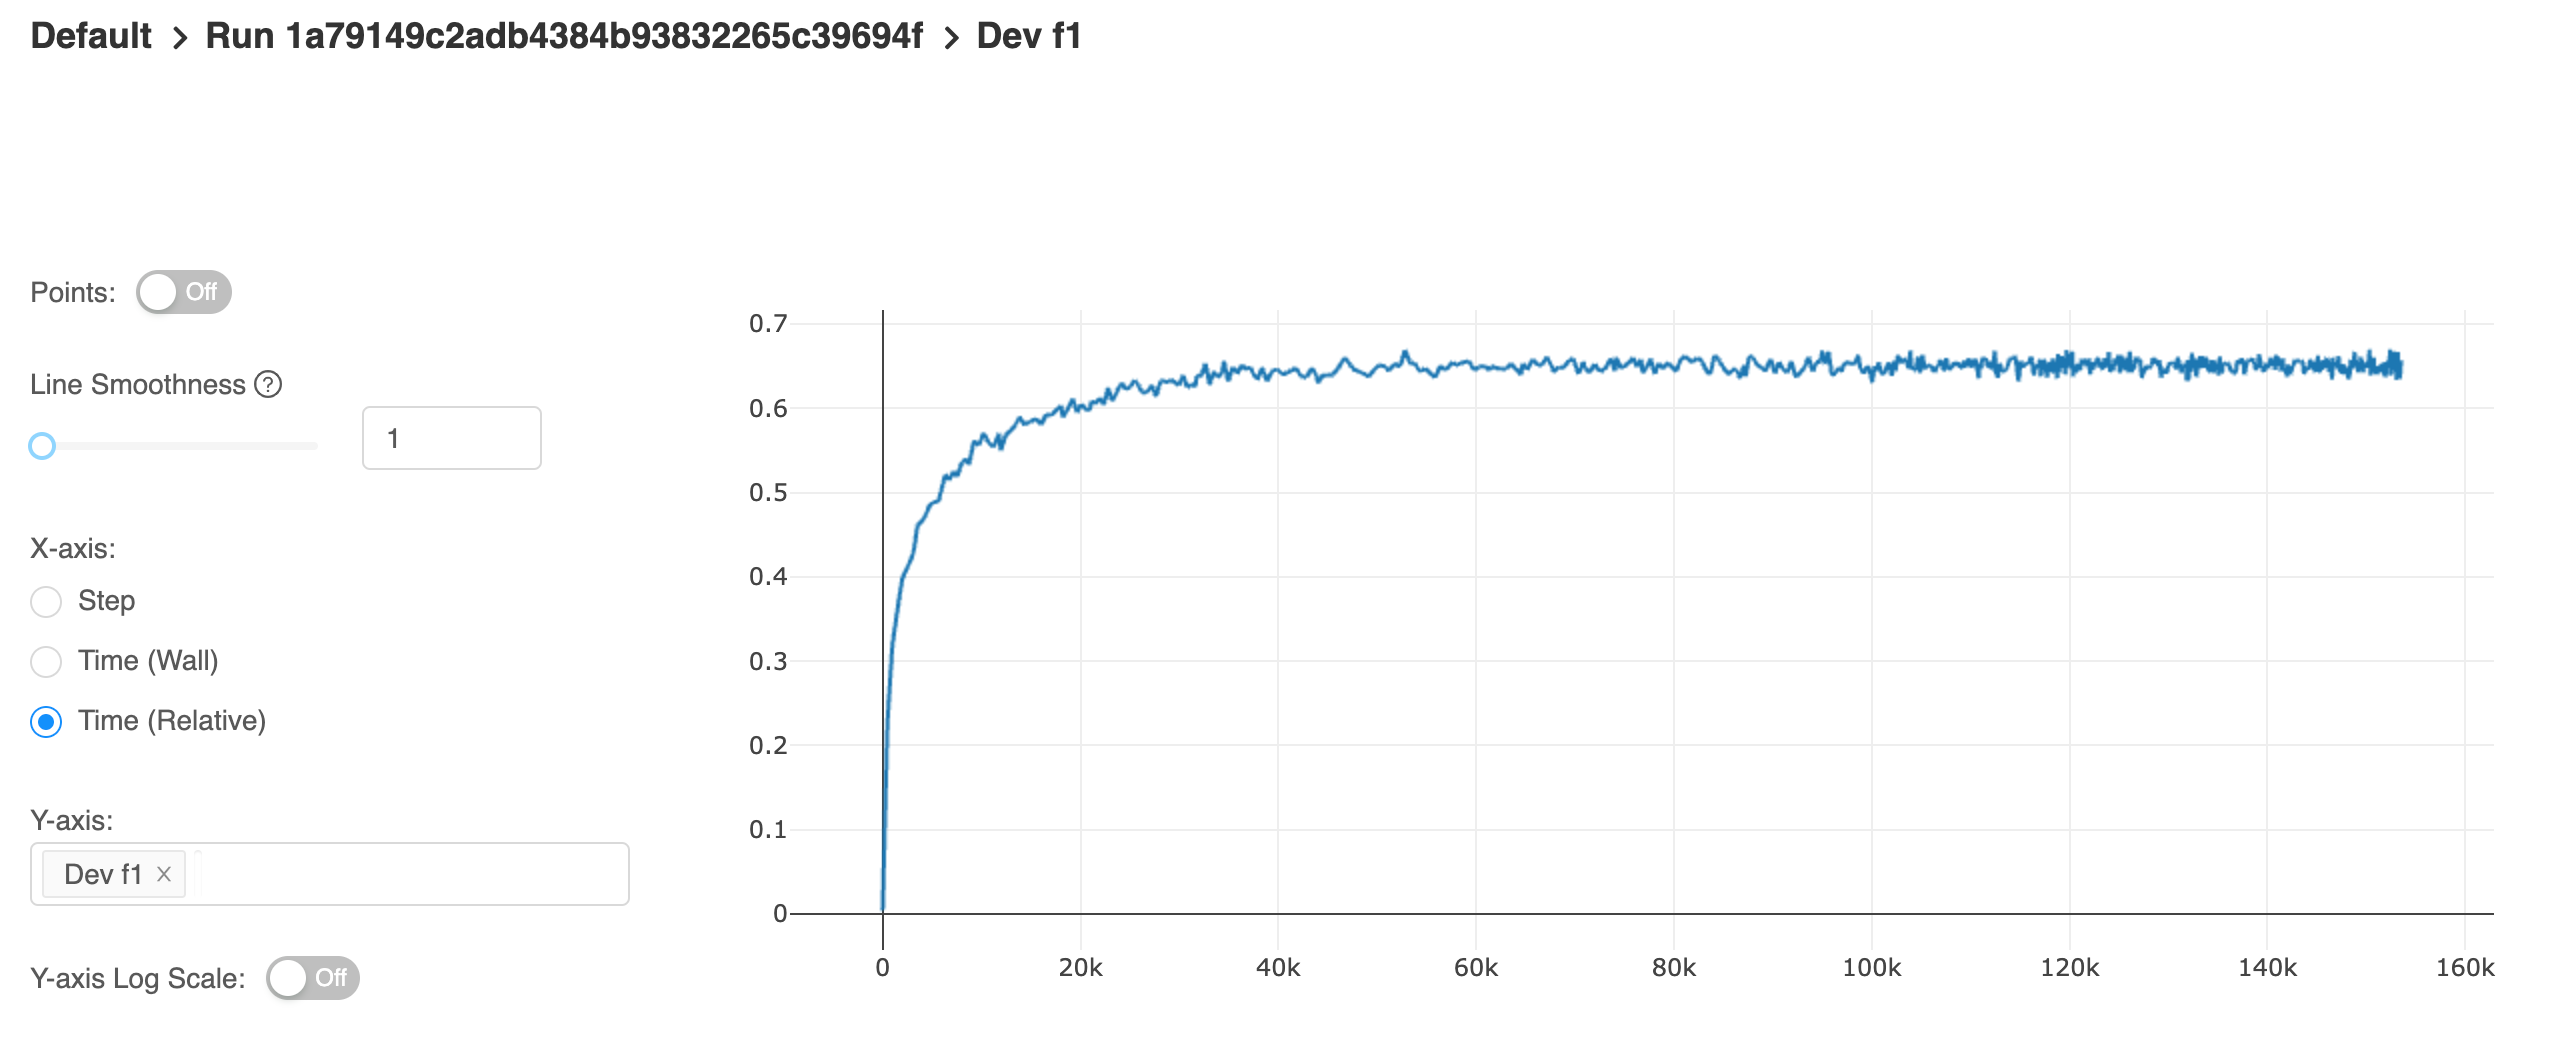

In [13]:
Image(filename = "img/dev_result_1.png", width=1000, height=1000)

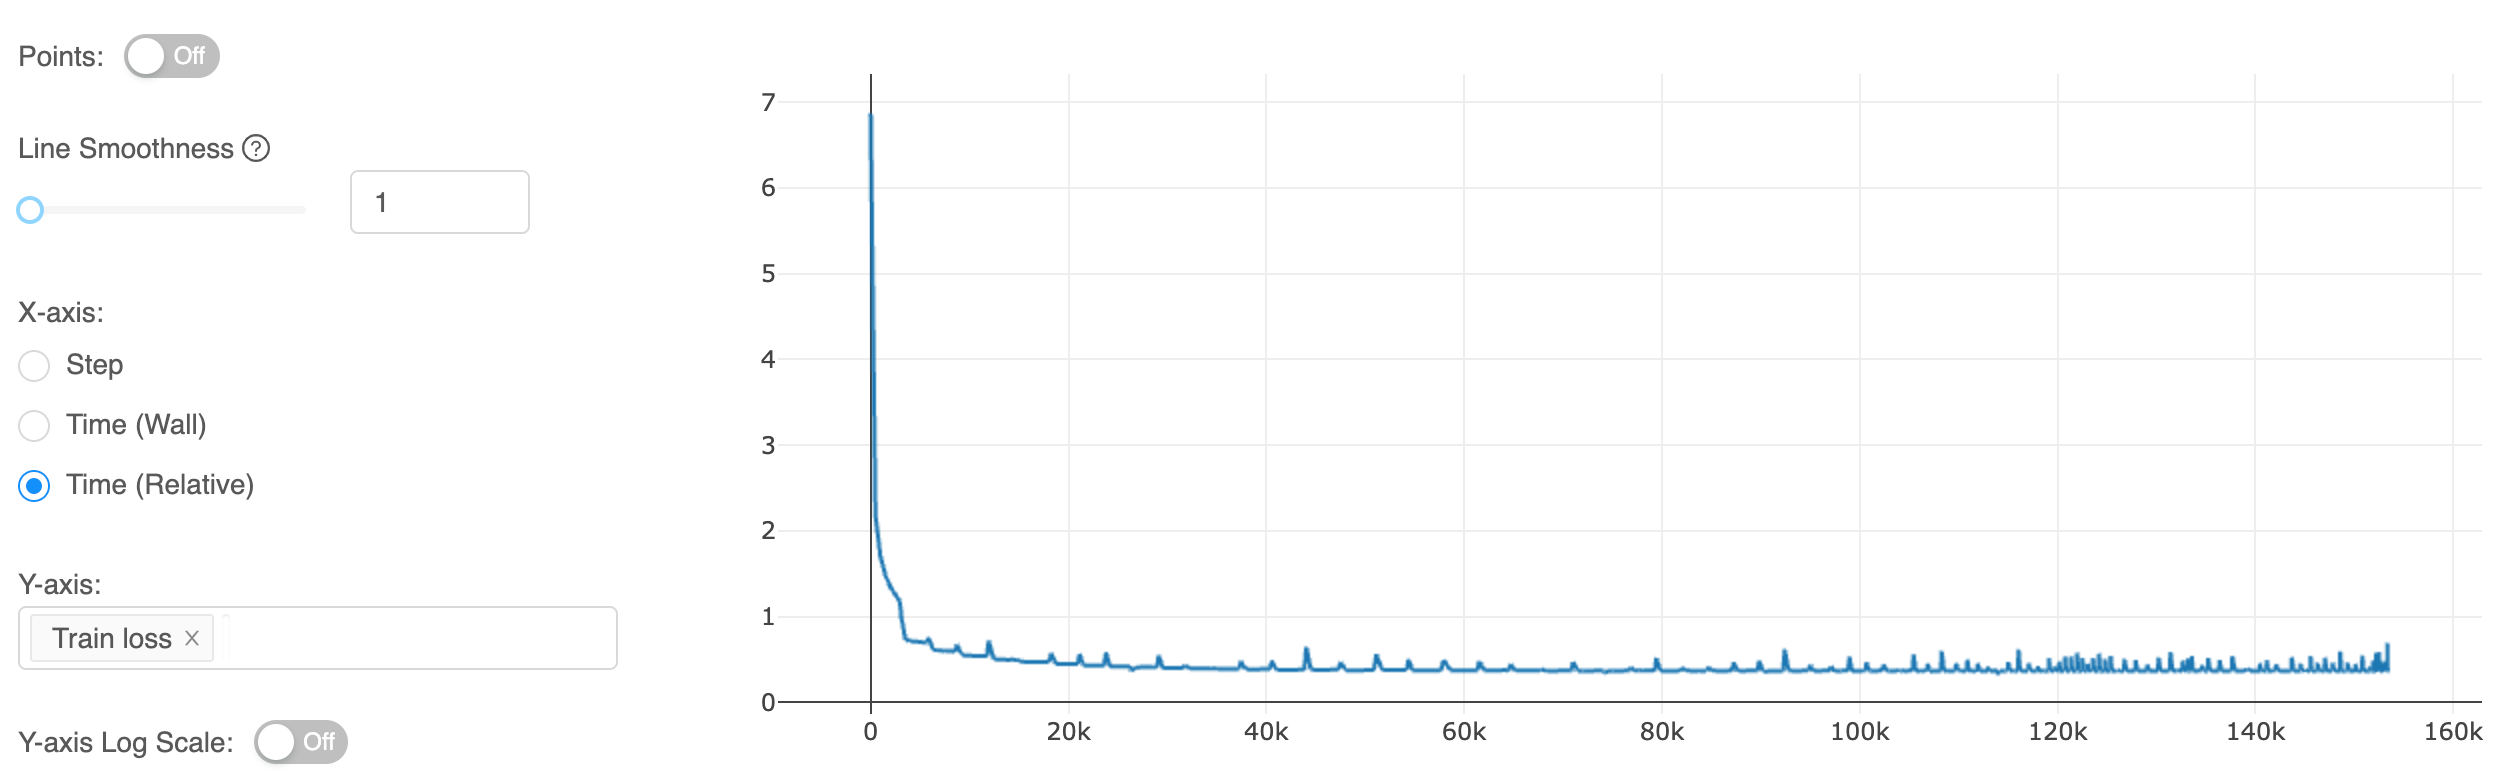

In [15]:
Image(filename = "img/train_loss.png", width=1000, height=1000)

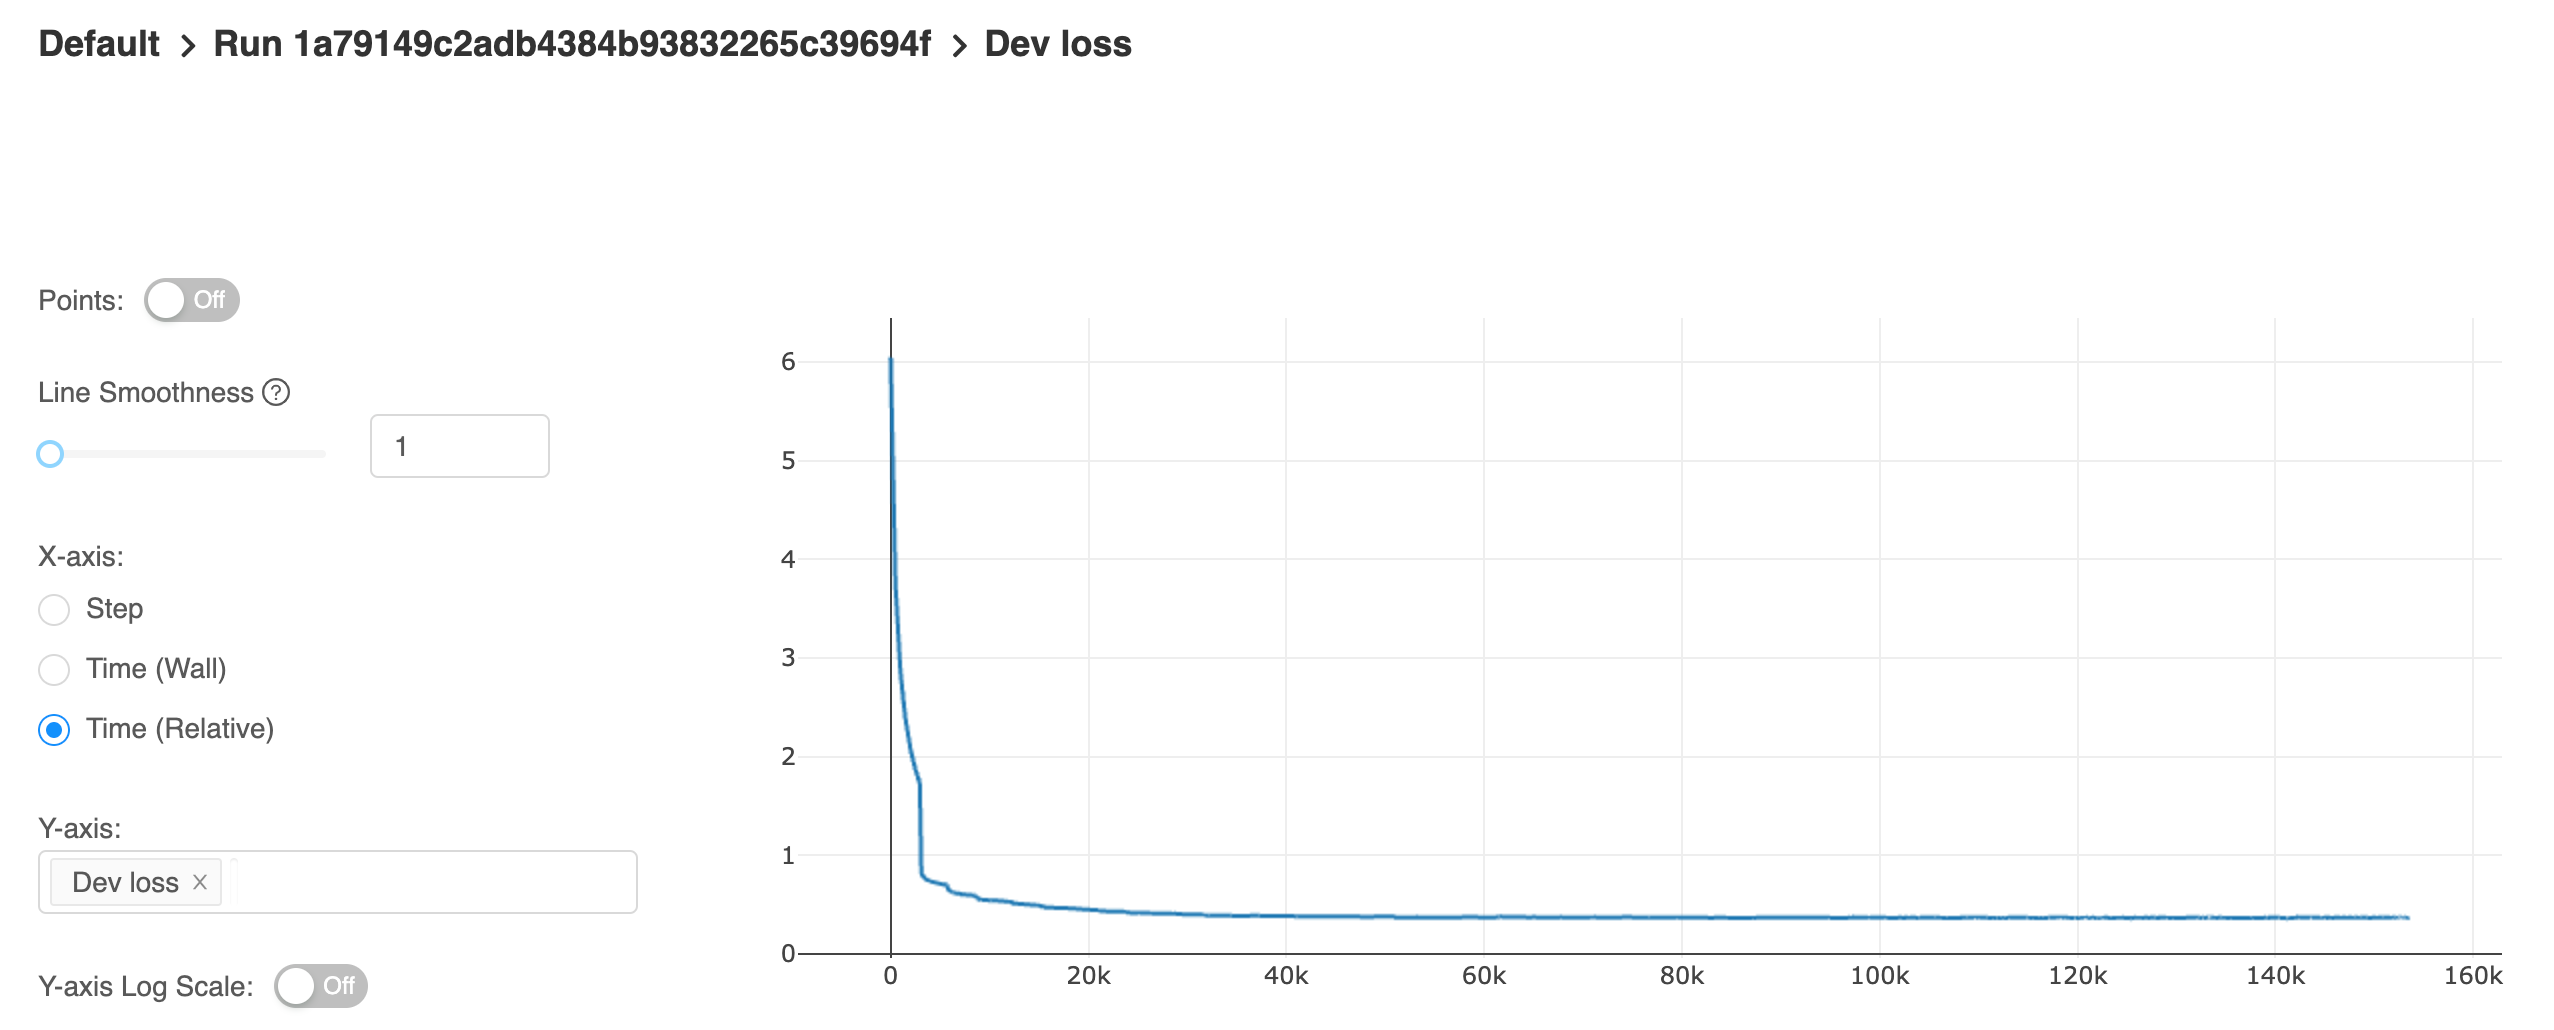

In [14]:
Image(filename = "img/dev_loss.png", width=1000, height=1000)

This is test set result:
* batch_size: 128
* dropout: 0.2
* epochs: 100
* h_dim1: 256
* learning rate: 0.9

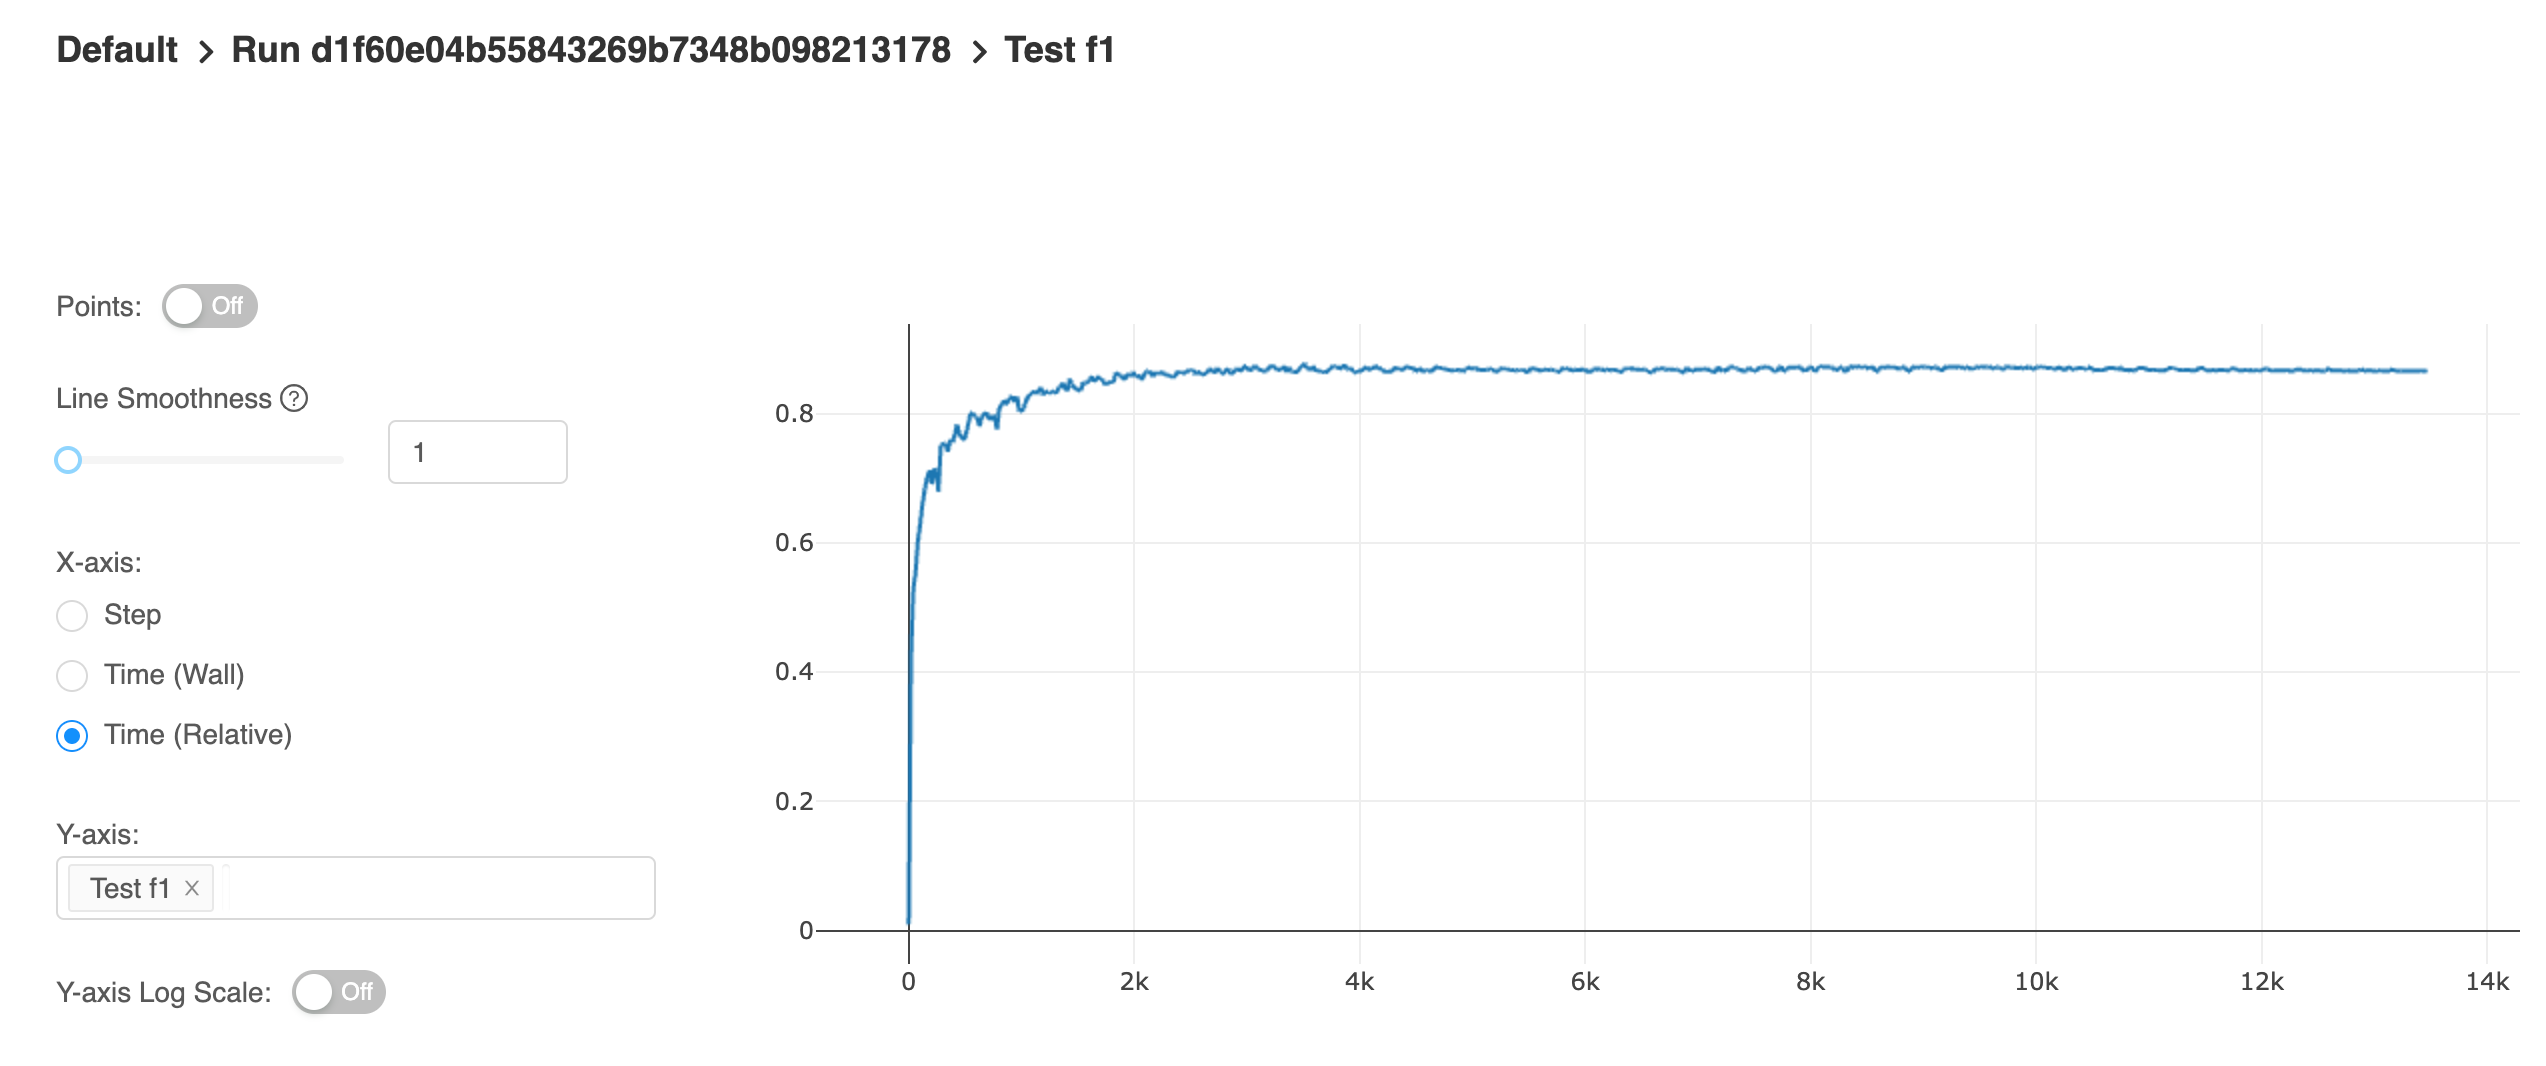

In [7]:
Image(filename = "img/test_result_1.png", width=1000, height=1000)